## Introduction

In this project, we will tackle a highly practical and industry-relevant machine learning problem: predicting loan defaults. Financial institutions—ranging from major banks to government-backed lenders—rely heavily on accurate risk assessment to minimize defaults and ensure borrowers meet their repayment obligations.

Our goal is to build a predictive model that identifies individuals who are most likely to default on their loans. By doing so, the institution can proactively allocate resources and implement targeted interventions to reduce financial risk and support high-risk borrowers more effectively.

The dataset provided includes a sample of individuals who received loans in 2021. The task is to leverage this data to develop a robust and reliable model that helps the organization make informed, data-driven decisions in its lending strategy.

## Understanding the Datasets

### Train vs. Test

I'll be working with two datasets that contain information about past borrowers from a financial institution. Let's see what we have:

`train.csv` - This is our main dataset containing records for 255,347 borrowers (70% of the sample). It includes whether each borrower defaulted on their loan payments - this will be crucial for training our model.

`test.csv` - This holds similar information for the remaining 109,435 borrowers, but without the default status. My task is to predict whether these borrowers will default based on the patterns learned from the training data.

I'll analyze the relationships and patterns in `train.csv` to build a model that can effectively predict loan defaults in `test.csv`. This will help identify high-risk borrowers before they default.

### Dataset descriptions

The project involves building a machine learning model to predict loan defaults using data provided in two files: `train.csv` and `test.csv`. Each row in these files corresponds to a unique loan, identified by the LoanID column. The data represents the state of each loan during the period it was active.

The `train.csv` file includes a target variable named Default, which is a binary indicator showing whether the borrower defaulted on the loan. This label will be used to train the model. Both `train.csv` and `test.csv` contain the same set of features, apart from the target column, which means the model can be trained on the labeled data and then used to make predictions on the unlabeled test data.

The task involves understanding the provided features, preparing the data accordingly, training a classification model, and using it to predict the likelihood of default for each loan in the test dataset.

In [33]:
# Importing required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
# 1. Checking for missing values in train and test datasets
print("Missing values in train_df:")
print(train_df.isnull().sum().sort_values(ascending=False)[train_df.isnull().sum() > 0])
print("\nMissing values in test_df:")
print(test_df.isnull().sum().sort_values(ascending=False)[test_df.isnull().sum() > 0])

Missing values in train_df:
Series([], dtype: int64)

Missing values in test_df:
Series([], dtype: int64)


In [8]:
# 2. Checking for duplicate rows
print("Duplicate rows in train_df:", train_df.duplicated().sum())
print("Duplicate rows in test_df:", test_df.duplicated().sum())

Duplicate rows in train_df: 0
Duplicate rows in test_df: 0


In [13]:
# 3. Data types and basic info
print("train_df info:")
train_df.info()
print("test_df info:")
test_df.info()

train_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 


In [12]:
# 4. Basic statistics for numerical columns
print("train_df describe:")
display(train_df.describe())
print("test_df describe:")
display(test_df.describe())

train_df describe:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


test_df describe:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000
mean,43.536483,82487.391036,127486.538667,574.665948,59.576315,2.501037,13.496206,36.086298,0.500263
std,15.015927,38966.033421,70703.100952,158.800306,34.548087,1.118149,6.647329,16.928304,0.231246
min,18.000000,15003.000000,5002.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48745.000000,66173.500000,437.000000,30.000000,2.000000,7.750000,24.000000,0.300000
50%,44.000000,82545.000000,127345.000000,575.000000,60.000000,3.000000,13.500000,36.000000,0.500000
75%,57.000000,116184.000000,188674.000000,712.000000,89.000000,4.000000,19.270000,48.000000,0.700000
max,69.000000,149999.000000,249995.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


Text(0.5, 1.0, 'Distribution of Target Variable (Default)')

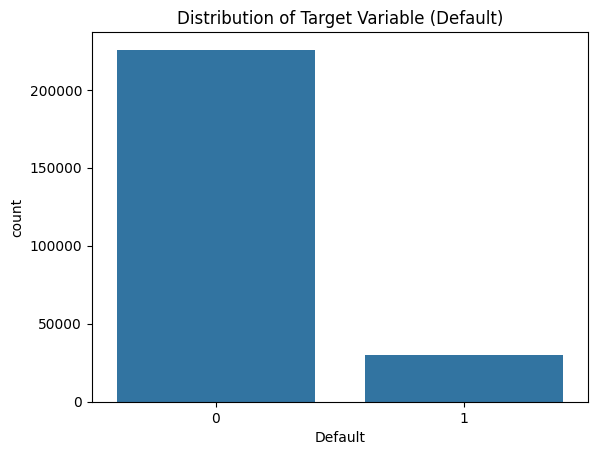

In [26]:
# 8. Visualizing target variable distribution
sns.countplot(x='Default', data=train_df)
plt.title('Distribution of Target Variable (Default)')

Text(0.5, 0.98, 'Numerical Feature Distributions')

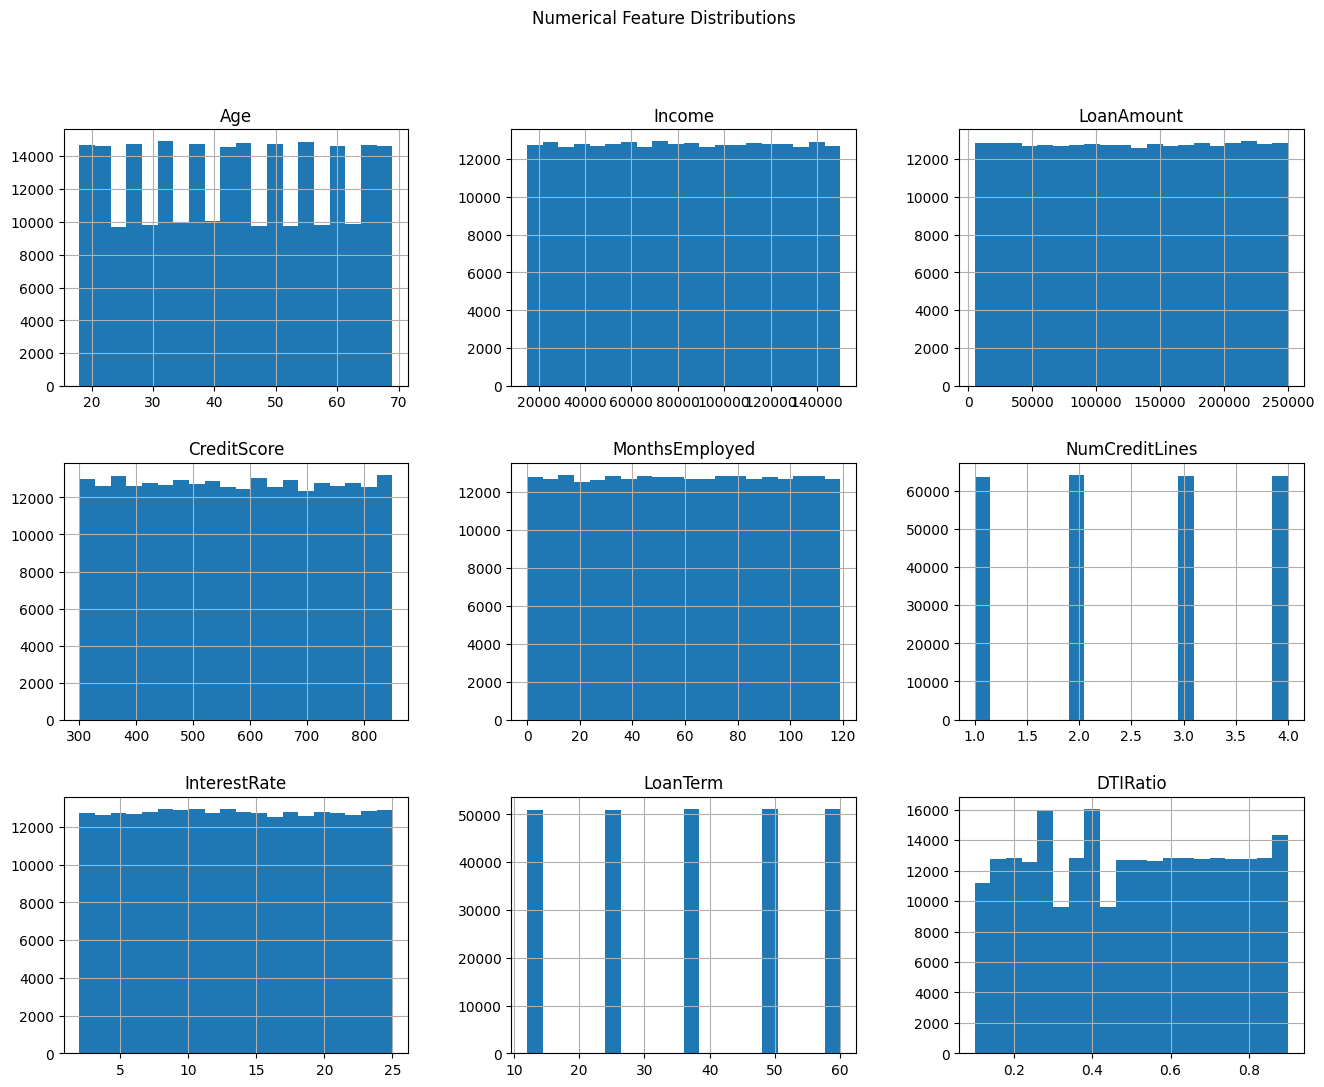

In [ ]:
# 9. Visualize numerical feature distributions
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop('Default')
train_df[num_cols].hist(bins=20, figsize=(16, 12))
plt.suptitle('Numerical Feature Distributions')

Text(0.5, 1.0, 'Correlation Heatmap')

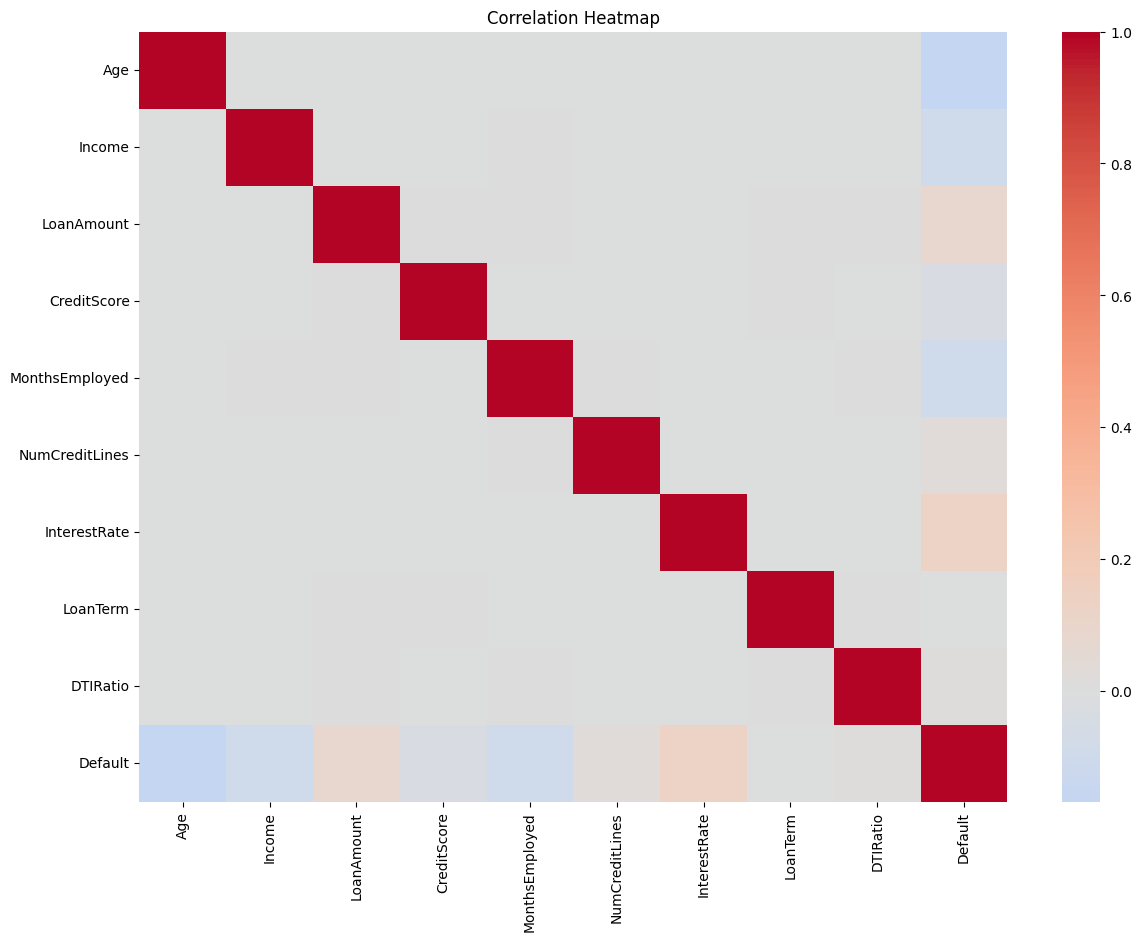

In [ ]:
# 10. Correlation heatmap for numerical features and target
corr = train_df[num_cols.tolist() + ['Default']].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

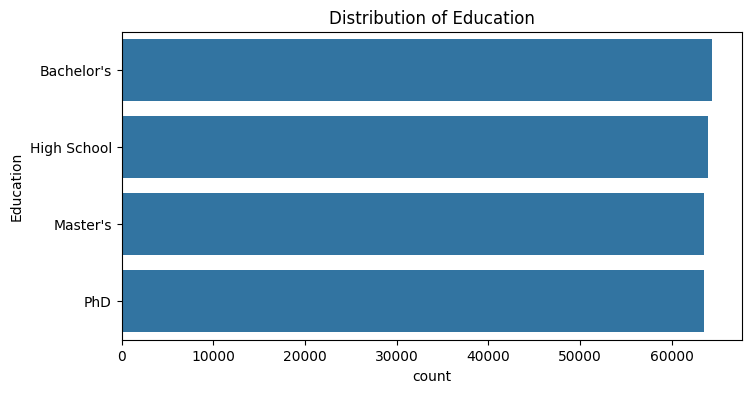

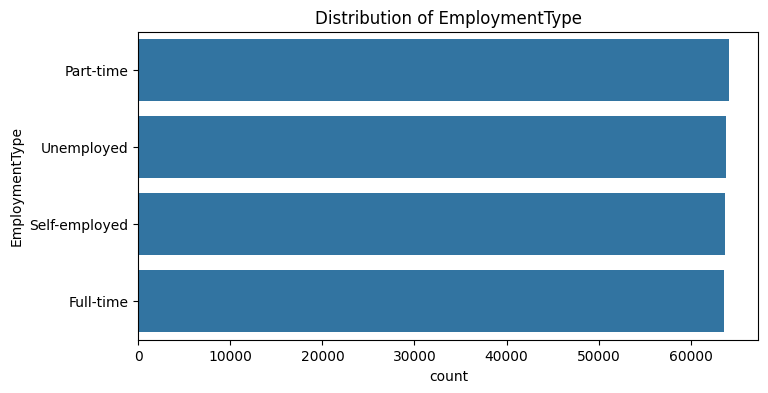

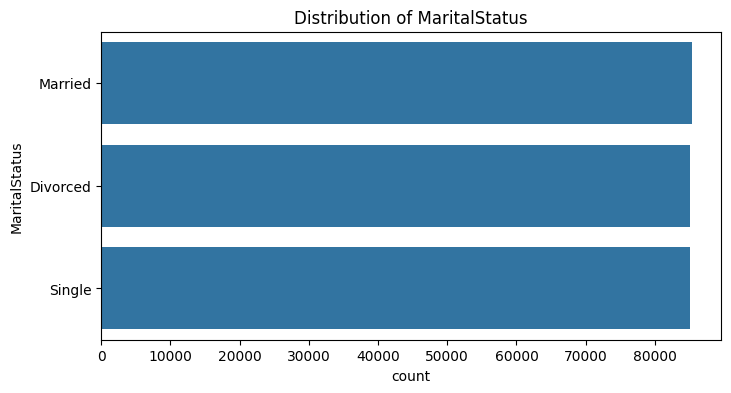

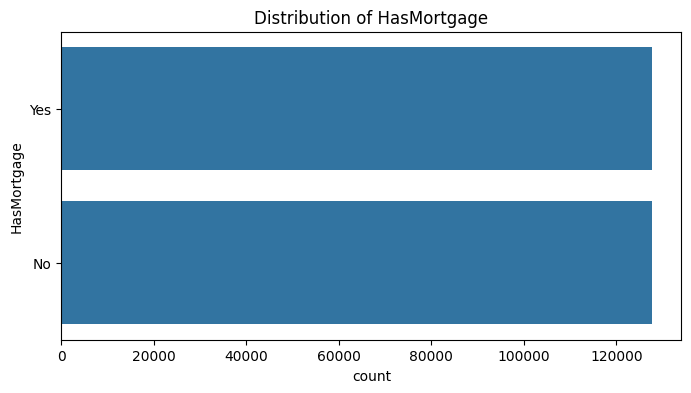

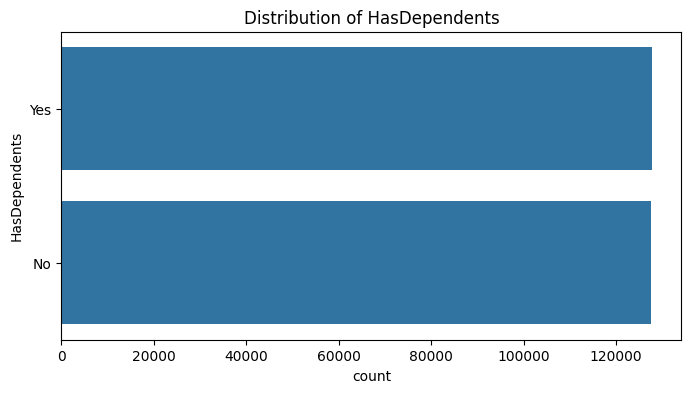

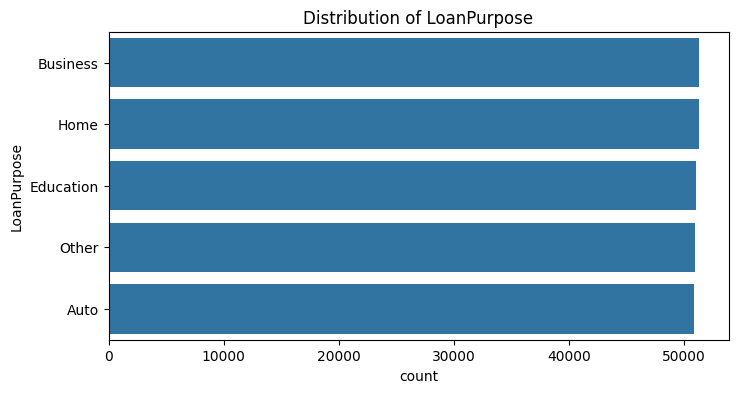

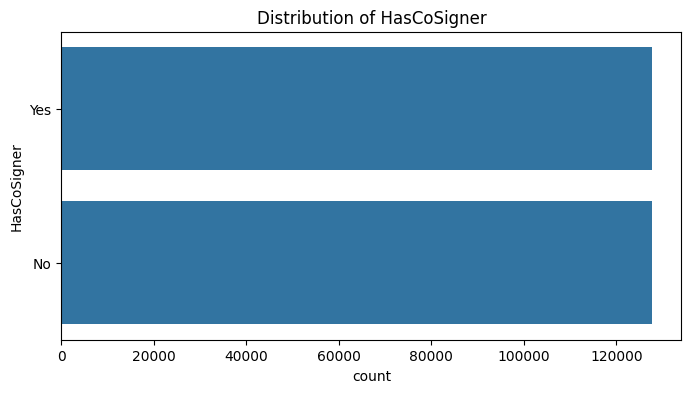

In [ ]:
# 11. Visualize categorical features (if any)
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.drop(['LoanID'], errors='ignore')
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Building and Evaluating a Predictive Model

Let's build a simple baseline model using logistic regression. This will help you get started with making predictions for the test set. You can later improve this by feature engineering, hyperparameter tuning, or using more advanced models.


In [35]:
# Prepare features and target
X = train_df.drop(['LoanID', 'Default'], axis=1)
y = train_df['Default']


In [36]:
# For categorical columns, use one-hot encoding (if any)
X = pd.get_dummies(X)
test_X = pd.get_dummies(test_df.drop(['LoanID'], axis=1))

In [ ]:
# Align columns of test set to train set
test_X = test_X.reindex(columns=X.columns, fill_value=0)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,32,131645,43797,802,23,2,6.10,24,0.13,False,...,True,True,False,False,False,False,False,True,True,False
1,61,134312,18402,369,87,2,12.99,60,0.59,False,...,False,True,False,False,True,False,False,False,False,True
2,55,115809,151774,563,3,3,5.51,48,0.82,True,...,True,False,True,False,False,False,False,True,False,True
3,58,94970,55789,337,24,1,23.93,36,0.77,True,...,False,True,False,False,True,False,False,False,True,False
4,63,71727,189798,451,52,3,22.05,48,0.44,False,...,True,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109430,67,76970,108110,404,67,3,10.51,36,0.18,False,...,True,False,True,True,False,False,False,False,True,False
109431,44,108272,238508,335,28,1,9.65,24,0.32,False,...,True,False,True,False,False,True,False,False,True,False
109432,54,73526,18513,576,75,2,17.22,36,0.62,False,...,False,False,True,False,False,True,False,False,True,False
109433,60,75296,38414,369,71,4,17.69,36,0.66,False,...,False,True,False,False,True,False,False,False,False,True


In [39]:
# Split train data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_X_scaled = scaler.transform(test_X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
print(lr.score(X_val, y_val))  # Accuracy on validation data

0.885275112590562


In [51]:
# Validation AUC
val_preds = lr.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, val_preds)
print(f"Validation ROC AUC: {auc:.4f}")

Validation ROC AUC: 0.7531


In [ ]:
# Predict probabilities for the test set
test_predicted_probability = lr.predict_proba(test_X)[:, 1]

# Create the required prediction_df
prediction_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'predicted_probability': test_predicted_probability
})

# Preview the output
print(prediction_df.shape)
prediction_df.head()

(109435, 2)


/Users/vedantwalia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,LoanID,predicted_probability
0,7RYZGMKJIR,0.0
1,JDL5RH07AM,0.0
2,STAL716Y79,1.0
3,SO0KKJ3IQB,0.0
4,T99CWTYDCP,1.0
